In [15]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [17]:
#punto 1: base de datos
#codigo para la implementacion de esta directamente sacado de la pagina dada
# esta base de datos es un estudio de los casos de hepatitis c en pacientes
from ucimlrepo import fetch_ucirepo  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats
  
# fetch dataset 
hepatitis_c_virus_hcv_for_egyptian_patients = fetch_ucirepo(id=503) 
  
# data (as pandas dataframes) 
X = hepatitis_c_virus_hcv_for_egyptian_patients.data.features 
y = hepatitis_c_virus_hcv_for_egyptian_patients.data.targets 
  
# metadata 
print(hepatitis_c_virus_hcv_for_egyptian_patients.metadata) 
  
# variable information 
print(hepatitis_c_virus_hcv_for_egyptian_patients.variables) 

%matplotlib inline

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')



{'uci_id': 503, 'name': 'Hepatitis C Virus (HCV) for Egyptian patients', 'repository_url': 'https://archive.ics.uci.edu/dataset/503/hepatitis+c+virus+hcv+for+egyptian+patients', 'data_url': 'https://archive.ics.uci.edu/static/public/503/data.csv', 'abstract': 'Egyptian patients who underwent treatment dosages for HCV about 18 months. Discretization should be applied based on expert recommendations; there is an attached file shows how.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1385, 'num_features': 28, 'feature_types': ['Real'], 'demographics': ['Age', 'Gender'], 'target_col': ['Baselinehistological staging'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2017, 'last_updated': 'Tue Apr 09 2024', 'dataset_doi': '10.24432/C5989V', 'creators': ['Sanaa Kamal', 'Mohamed ElEleimy', 'Doaa Hegazy', 'Mahmoud Nasr'], 'intro_paper': {'ID': 232, 'type': 'NATIVE', 'ti

Datos corregidos:
   Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0    56       0   35      2               1          1          1   
1    46       0   29      1               2          2          1   
2    57       0   33      2               2          2          2   
3    49       1   33      1               2          1          2   
4    59       0   32      1               1          2          1   

   Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  ALT 36  \
0                                 2          2                 2  ...       5   
1                                 2          2                 1  ...      57   
2                                 1          1                 1  ...       5   
3                                 1          2                 1  ...      48   
4                                 2          2                 2  ...      94   

   ALT 48  ALT after 24 w  RNA Base   RNA 4   RNA 12  RNA EOT  RNA EF  \
0      

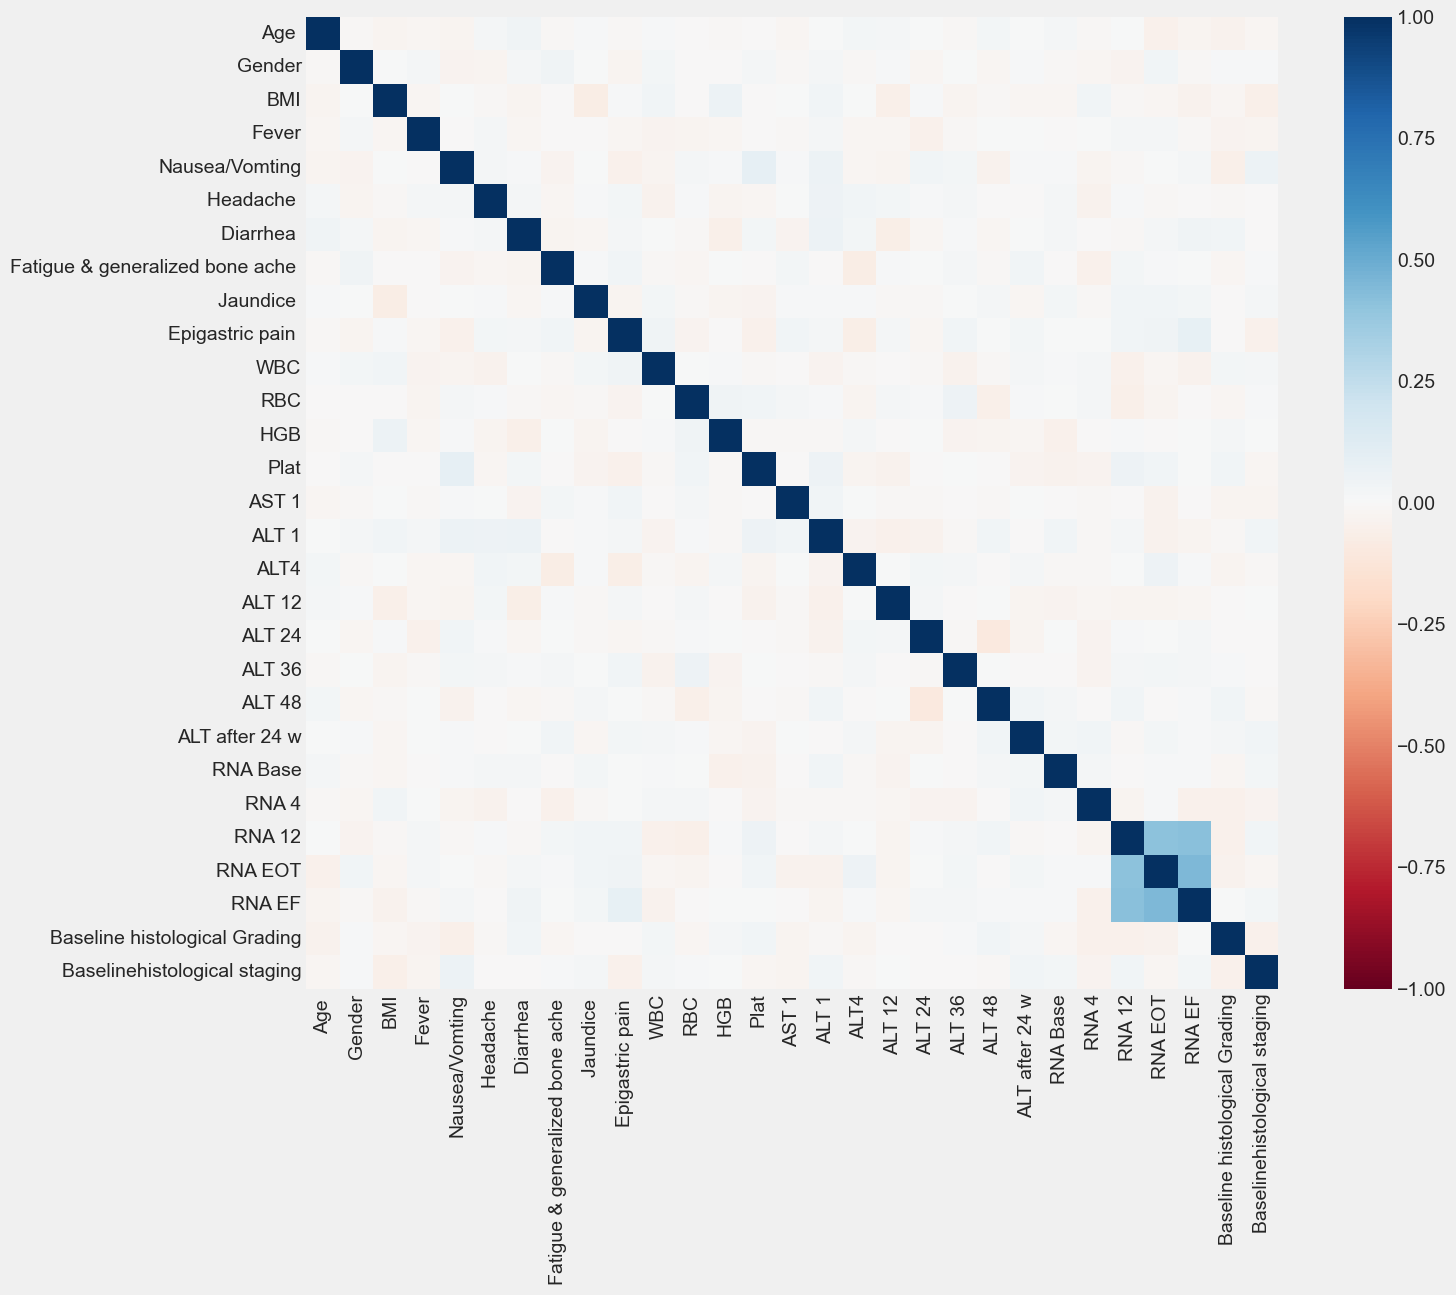

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Cargar datos
hepatitis_c_virus_hcv_for_egyptian_patients = fetch_ucirepo(id=503)
X = hepatitis_c_virus_hcv_for_egyptian_patients.data.features
y = hepatitis_c_virus_hcv_for_egyptian_patients.data.targets

# Agrupar en un DataFrame
df = pd.concat([X, y], axis=1)

# Convertir a enteros las columnas específicas
df['RBC'] = df['RBC'].astype(int)
df['Plat'] = df['Plat'].astype(int)
df['ALT4'] = df['ALT4'].astype(int)

# Convertir 'Gender' a valores numéricos
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Verificación de datos
print("Datos corregidos:")
print(df.head())
print(df.describe())
print(df.info())

# Mapa de calor de correlaciones
corrmat = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=1, vmin=-1, square=True, cmap='RdBu')
plt.show()

# Selección de características y target
X = df[['Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ', 'Diarrhea ', 
        'Fatigue & generalized bone ache ', 'Jaundice ', 'Epigastric pain ', 
        'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1', 'ALT4', 'ALT 12', 
        'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w', 'RNA Base', 'RNA 4', 
        'RNA 12', 'RNA EOT', 'RNA EF', 'Baseline histological Grading']]
y = df['Age ']

# Estandarización de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Stochastic Gradient Descent

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

# Si aún no has definido results_df, crea un DataFrame vacío o inicializado con datos.
results_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])


# Espacio de búsqueda de hiperparámetros
param_grid = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive'],  # Funciones de pérdida
    'penalty': ['l2', 'l1', 'elasticnet'],  # Tipos de regularización
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Tasa de regularización
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],  # Estrategia de aprendizaje
    'eta0': [0.01, 0.1, 1],  # Tasa de aprendizaje inicial
    'max_iter': [1000, 2000, 3000],  # Número máximo de iteraciones
    'tol': [1e-3, 1e-4, 1e-5],  # Tolerancia para la convergencia
}

# Crear el modelo SGDRegressor
sgd = SGDRegressor(random_state=42)

 #Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=sgd,
    param_grid=param_grid,
    cv=5,  # Validación cruzada
    scoring='neg_mean_squared_error',  # Métrica de evaluación
    verbose=2,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ajustar el modelo
grid_search.fit(X_scaled, y)  # Asegúrate de que X_scaled y y sean consistentes

# Resultados
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntaje (neg MSE):", grid_search.best_score_)

# Funciones de evaluación
def cross_val(model):
    pred = cross_val_score(model, X_scaled, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print(f'MAE: {mae:0.2f}')
    print(f'MSE: {mse:0.2f}')
    print(f'RMSE:: {rmse:0.2f}')
    print(f'R2 Square: {r2_square:0.2f}')
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# Modelo de regresión Stochastic Gradient Descent


sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df,results_df_2])

Fitting 5 folds for each of 3888 candidates, totalling 19440 fits
Mejores hiperparámetros: {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'adaptive', 'loss': 'huber', 'max_iter': 1000, 'penalty': 'l1', 'tol': 1e-05}
Mejor puntaje (neg MSE): -77.1488239609118
Test set evaluation:
_____________________________________
MAE: 7.88
MSE: 80.48
RMSE:: 8.97
R2 Square: -0.02
__________________________________
Train set evaluation:
_____________________________________
MAE: 7.48
MSE: 74.86
RMSE:: 8.65
R2 Square: 0.02
__________________________________


C:\Users\migue\AppData\Local\Temp\ipykernel_6168\173387536.py:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df,results_df_2])


[learning_curve] Training set sizes: [ 110  221  332  443  554  664  775  886  997 1108]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


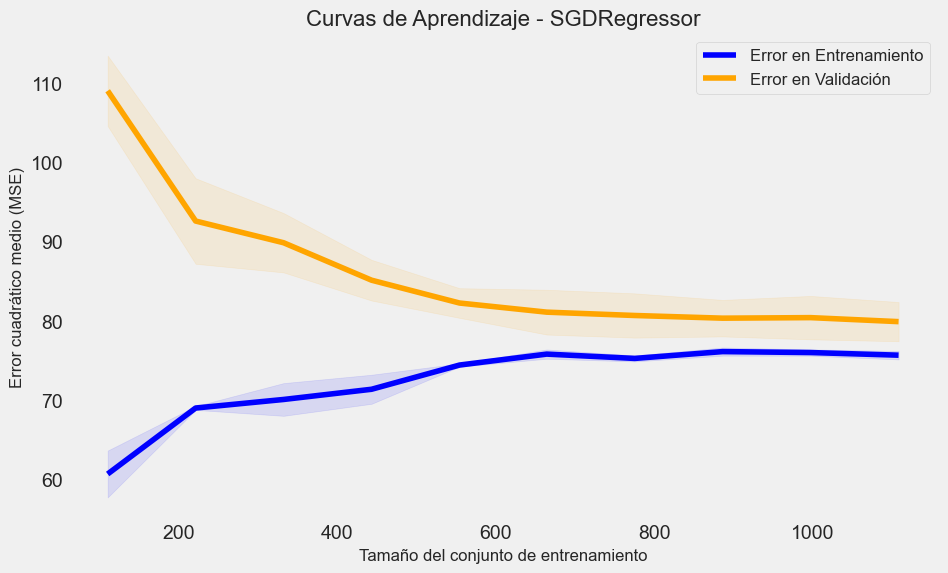

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Configurar el modelo
sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# Generar las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    estimator=sgd,
    X=X_scaled,
    y=y,
    cv=5,  # Validación cruzada
    scoring='neg_mean_squared_error',  # Evaluar el error cuadrático negativo
    n_jobs=-1,  # Usar todos los núcleos disponibles
    train_sizes=np.linspace(0.1, 1.0, 10),  # Tamaños de entrenamiento
    verbose=1
)

# Calcular el promedio y desviación estándar de los puntajes
train_mean = -np.mean(train_scores, axis=1)  # Negar para obtener MSE positivo
train_std = np.std(train_scores, axis=1)

test_mean = -np.mean(test_scores, axis=1)  # Negar para obtener MSE positivo
test_std = np.std(test_scores, axis=1)

# Graficar las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Error en Entrenamiento", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, test_mean, label="Error en Validación", color="orange")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange")

# Etiquetas y título
plt.title("Curvas de Aprendizaje - SGDRegressor", fontsize=16)
plt.xlabel("Tamaño del conjunto de entrenamiento", fontsize=12)
plt.ylabel("Error cuadrático medio (MSE)", fontsize=12)
plt.legend(loc="best", fontsize=12)
plt.grid()
plt.show()
